## Otras funciones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
aux1 = np.arange(-3,3,0.1)
aux2 = np.arange(1,4,0.05)
aux3 = 30 + 2*aux1 - 1.5*np.log(aux2) + 2*np.random.normal(size=len(aux1))
Datos = pd.DataFrame({'Y': aux3, 'X1': aux1, 'X2': aux2})
Datos.head(10)

,Y,X1,X2
0,23.648663,-3.0,1.00
1,22.768899,-2.9,1.05
2,24.497640,-2.8,1.10
3,24.277583,-2.7,1.15
4,23.571200,-2.6,1.20
5,23.509154,-2.5,1.25
6,23.251512,-2.4,1.30
7,22.250698,-2.3,1.35
8,28.135890,-2.2,1.40
9,27.017237,-2.1,1.45


In [2]:
modelo = smf.ols('Y ~ X1 + np.log(X2)', data = Datos)
result = modelo.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     65.68
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           1.60e-15
Time:                        18:42:51   Log-Likelihood:                -121.86
No. Observations:                  60   AIC:                             249.7
Df Residuals:                      57   BIC:                             256.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8527      3.082      8.712      0.000      20.681      33.025
X1             1.2195      0.809      1.507      0.137      -0.401       2.840
np.log(X2)     1.8001      3.624      0.497      0.621      -5.457       9.057
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.613
Skew:                          -0.060   Prob(JB):                        0.736
Kurtosis:                       2.519   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
result.conf_int()

,0,1
Intercept,20.680585,33.024753
X1,-0.400550,2.839546
np.log(X2),-5.457329,9.057440


In [4]:
result.resid

0     0.454487
1    -0.635052
2     0.888001
3     0.465979
4    -0.438964
5    -0.696442
6    -1.146633
7    -2.337332
8     3.360447
9     2.056678
10   -2.877290
11   -1.893090
12    0.515945
13    0.757220
14    0.073181
15   -0.662608
16   -0.890336
17    2.726291
18    1.168531
19   -1.669218
20    3.764416
21    0.822782
22   -1.066268
23   -1.825170
24    1.058507
25   -3.605960
26    3.026946
27    1.856245
28    0.303502
29   -2.914197
30   -3.145337
31    1.428987
32    0.224601
33   -0.610858
34    3.408776
35   -0.259267
36    1.856505
37    0.647938
38   -3.879649
39   -0.531302
40    2.181540
41    1.349629
42   -0.944353
43   -0.386978
44   -3.230395
45    1.530814
46   -1.142490
47   -0.072997
48   -2.650083
49    0.778079
50   -0.075715
51    3.287104
52    0.105429
53    0.272493
54   -2.773035
55   -0.793470
56   -0.310586
57    2.098167
58   -0.626820
59    1.622672
dtype: float64

In [5]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std as IC

In [6]:
distanc, low, up = IC(result)
intervalos = pd.DataFrame({'Intervalo inferior': low, 'Predicción': result.predict(), 'Intervalo superior': up, 'Error': distanc})
intervalos

,Intervalo inferior,Predicción,Intervalo superior,Error
0,19.051889,23.194176,27.336462,2.068593
1,19.327408,23.403951,27.480493,2.035762
2,19.586250,23.609639,27.633028,2.009218
3,19.830791,23.811604,27.792418,1.987956
4,20.063087,24.010164,27.957241,1.971109
5,20.284913,24.205595,28.126278,1.957927
6,20.497799,24.398145,28.298491,1.947772
7,20.703057,24.588029,28.473001,1.940094
8,20.901816,24.775443,28.649069,1.934429
9,21.095040,24.960559,28.826077,1.930380


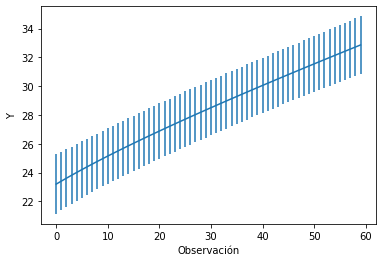

In [7]:
plt.errorbar(intervalos.index, intervalos['Predicción'], yerr=intervalos['Error'])
plt.xlabel('Observación')
plt.ylabel('Y')
plt.show()

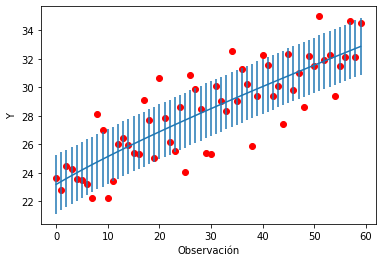

In [8]:
plt.errorbar(intervalos.index, intervalos['Predicción'], yerr=intervalos['Error'])
plt.scatter(Datos.index, Datos['Y'], c='r')
plt.xlabel('Observación')
plt.ylabel('Y')
plt.show()

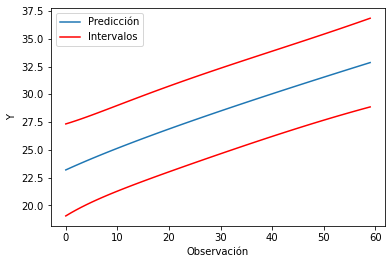

In [9]:
plt.plot(intervalos.index, intervalos['Predicción'],
        intervalos.index, intervalos['Intervalo inferior'], 'r',
        intervalos.index, intervalos['Intervalo superior'], 'r')
plt.legend(['Predicción', 'Intervalos'])
plt.xlabel('Observación')
plt.ylabel('Y')
plt.show()

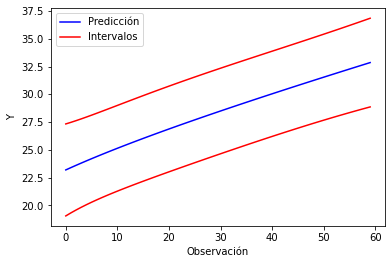

In [10]:
intervalos[['Predicción', 'Intervalo inferior', 'Intervalo superior']].plot(color=['b', 'r', 'r'], legend=False)
plt.legend(['Predicción', 'Intervalos'])
plt.xlabel('Observación')
plt.ylabel('Y')
plt.savefig('Intervalos.png', dpi=500, facecolor='w')
plt.show()